Credibilidad separado en tres partes:
    Credibilidad del texto: 20%
    La razon de bajar el porcentaje en la credibilidad del texto es que no vamos a recorrer todos los twits en busca de erratas o palabras mal sonantes.
    Todas las cuentas son verificadas y han sido seleccionadas debido a que se tiene conocimiento sobre ellas y aunque algunas de estas si utilizan un lenguaje menos formal no quita que su contenido sea verídico. Entonces vamos a penalizar dichas cuentas con un lenguaje menos formal otorgandole un 50 sobre 100.
    Credibilidad de usuario: 40%
    Credibilidad social: 40%

In [20]:
import pandas as pd
from twython import Twython




APP_KEY = 'kTbYPP7inrfVIdsNYuCdLfbLs' # API Key
APP_SECRET = 'LTQ0Dp7GedTXmAmSdajFcnm2V6TTZjxeqjHxDnoObZmrbtzszm' # API Secret Key
OAUTH_TOKEN = '1521505978793050112-qelhMJdfv1Czl78ebk4heIxcRBxp1Z' # Access Token
OAUTH_TOKEN_SECRET = 'YhOpm1mo78nBO4BUT8HGQp66ctFQRqzQ586df1JxpLoKZ' # Access Token Secret




twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
 



def follows_twit(twitter,user):
    twitt_info = twitter.show_user(screen_name = user)
    following = twitt_info['friends_count']
    followers = twitt_info['followers_count']
    created_at = twitt_info['created_at']
    verified= twitt_info['verified']
    return (followers,following,created_at,verified)



df = pd.read_csv('/Users/adrihp/Master/MBID01/Practica1/accountsEMBS.csv', encoding='latin-1')



Followers, Following , Created_at , Verified= [], [], [], []
for element in df['Twitter_handle']:
    miau = follows_twit(twitter,element)
    Followers.append(miau[0])
    Following.append(miau[1])
    Created_at.append(miau[2][-4:])
    Verified.append(miau[3])




df['Followers'] = Followers
df['Following'] = Following
df['Created_at'] = Created_at
df['Verified'] = Verified



#df.to_csv('/Users/adrihp/Master/MBID01/accountsEMBS.csv')


In [21]:
df.head(10)

,Unique_ID,org_name,org_url,Twitter_URL,Twitter_handle,earliest_tweet_in_db,number_of_tweets_in_db,Followers,Following,Created_at,Verified
0,1,Pedro Sanchez,NaN,https://twitter.com/sanchezcastejon,sanchezcastejon,NaN,NaN,1668885,6034,2009,True
1,2,Estopa,NaN,https://twitter.com/estopaoficial,estopaoficial,NaN,NaN,1011518,726,2011,True
2,3,Billkilgore,NaN,https://twitter.com/billkilgore_,billkilgore_,NaN,NaN,203926,1634,2017,False
3,4,Antonio,NaN,https://twitter.com/levmauc,levmauc,NaN,NaN,378085,236085,2016,False
4,5,Knekro,NaN,https://twitter.com/KNekro,KNekro,NaN,NaN,440555,278,2012,True
5,6,Crespo,NaN,https://twitter.com/QuantumFracture,QuantumFracture,NaN,NaN,372247,695,2012,True
6,7,Arcane,NaN,https://twitter.com/arcaneshow,arcaneshow,NaN,NaN,542285,14,2021,True
7,8,LoL Esports,NaN,https://twitter.com/lolesports,lolesports,NaN,NaN,2195607,549,2012,True
8,9,Illojuan,NaN,https://twitter.com/LMDShow,LMDShow,NaN,NaN,726400,371,2014,True
9,10,Alex Riveiro,NaN,https://twitter.com/alex_riveiro,alex_riveiro,NaN,NaN,318190,799,2009,True


In [22]:
#Credibilidad del texto

credibilidad_textual = [20,10,10,20,10,20,20,20,10,20]
df['Credibilidad_textual'] = credibilidad_textual

In [23]:
df.head(10)

,Unique_ID,org_name,org_url,Twitter_URL,Twitter_handle,earliest_tweet_in_db,number_of_tweets_in_db,Followers,Following,Created_at,Verified,Credibilidad_textual
0,1,Pedro Sanchez,NaN,https://twitter.com/sanchezcastejon,sanchezcastejon,NaN,NaN,1668885,6034,2009,True,20
1,2,Estopa,NaN,https://twitter.com/estopaoficial,estopaoficial,NaN,NaN,1011518,726,2011,True,10
2,3,Billkilgore,NaN,https://twitter.com/billkilgore_,billkilgore_,NaN,NaN,203926,1634,2017,False,10
3,4,Antonio,NaN,https://twitter.com/levmauc,levmauc,NaN,NaN,378085,236085,2016,False,20
4,5,Knekro,NaN,https://twitter.com/KNekro,KNekro,NaN,NaN,440555,278,2012,True,10
5,6,Crespo,NaN,https://twitter.com/QuantumFracture,QuantumFracture,NaN,NaN,372247,695,2012,True,20
6,7,Arcane,NaN,https://twitter.com/arcaneshow,arcaneshow,NaN,NaN,542285,14,2021,True,20
7,8,LoL Esports,NaN,https://twitter.com/lolesports,lolesports,NaN,NaN,2195607,549,2012,True,20
8,9,Illojuan,NaN,https://twitter.com/LMDShow,LMDShow,NaN,NaN,726400,371,2014,True,10
9,10,Alex Riveiro,NaN,https://twitter.com/alex_riveiro,alex_riveiro,NaN,NaN,318190,799,2009,True,20


In [24]:
#Credibilidad de usuario
#Verified 0/50
Credibilidad_de_usuario = []
for element in df['Verified']:
    if element == True:
#Añadimos 20 porque una cuenta verificada pondera la mitad de la credibilidad de usuario.
        Credibilidad_de_usuario.append(20)
    else:
        Credibilidad_de_usuario.append(0)
#Sacados de los papers
Max_account_age = 2006
for i in range (0,10):
    Credibilidad_de_usuario[i] = Credibilidad_de_usuario[i]+((2023-int(df['Created_at'][i]))/(2023-Max_account_age))*20
df['Credibilidad_de_usuario'] = Credibilidad_de_usuario


In [25]:
df

,Unique_ID,org_name,org_url,Twitter_URL,Twitter_handle,earliest_tweet_in_db,number_of_tweets_in_db,Followers,Following,Created_at,Verified,Credibilidad_textual,Credibilidad_de_usuario
0,1,Pedro Sanchez,NaN,https://twitter.com/sanchezcastejon,sanchezcastejon,NaN,NaN,1668885,6034,2009,True,20,36.470588
1,2,Estopa,NaN,https://twitter.com/estopaoficial,estopaoficial,NaN,NaN,1011518,726,2011,True,10,34.117647
2,3,Billkilgore,NaN,https://twitter.com/billkilgore_,billkilgore_,NaN,NaN,203926,1634,2017,False,10,7.058824
3,4,Antonio,NaN,https://twitter.com/levmauc,levmauc,NaN,NaN,378085,236085,2016,False,20,8.235294
4,5,Knekro,NaN,https://twitter.com/KNekro,KNekro,NaN,NaN,440555,278,2012,True,10,32.941176
5,6,Crespo,NaN,https://twitter.com/QuantumFracture,QuantumFracture,NaN,NaN,372247,695,2012,True,20,32.941176
6,7,Arcane,NaN,https://twitter.com/arcaneshow,arcaneshow,NaN,NaN,542285,14,2021,True,20,22.352941
7,8,LoL Esports,NaN,https://twitter.com/lolesports,lolesports,NaN,NaN,2195607,549,2012,True,20,32.941176
8,9,Illojuan,NaN,https://twitter.com/LMDShow,LMDShow,NaN,NaN,726400,371,2014,True,10,30.588235
9,10,Alex Riveiro,NaN,https://twitter.com/alex_riveiro,alex_riveiro,NaN,NaN,318190,799,2009,True,20,36.470588


In [26]:
#Credibilidad social
#Followers impact

Credibilidad_social = [] 
#Sacado del paper
max_followers = 2200000

for element in df['Followers']:
    Credibilidad_social.append((element/max_followers)*20)

#Followers/following

for i in range(0,10):
    Credibilidad_social[i] = Credibilidad_social[i] + (df['Followers'][i]/(df['Followers'][i]+df['Following'][i]))*20

df['Credibilidad_social'] = Credibilidad_social



In [27]:
df

,Unique_ID,org_name,org_url,Twitter_URL,Twitter_handle,earliest_tweet_in_db,number_of_tweets_in_db,Followers,Following,Created_at,Verified,Credibilidad_textual,Credibilidad_de_usuario,Credibilidad_social
0,1,Pedro Sanchez,NaN,https://twitter.com/sanchezcastejon,sanchezcastejon,NaN,NaN,1668885,6034,2009,True,20,36.470588,35.099631
1,2,Estopa,NaN,https://twitter.com/estopaoficial,estopaoficial,NaN,NaN,1011518,726,2011,True,10,34.117647,29.181274
2,3,Billkilgore,NaN,https://twitter.com/billkilgore_,billkilgore_,NaN,NaN,203926,1634,2017,False,10,7.058824,21.694892
3,4,Antonio,NaN,https://twitter.com/levmauc,levmauc,NaN,NaN,378085,236085,2016,False,20,8.235294,15.749200
4,5,Knekro,NaN,https://twitter.com/KNekro,KNekro,NaN,NaN,440555,278,2012,True,10,32.941176,23.992433
5,6,Crespo,NaN,https://twitter.com/QuantumFracture,QuantumFracture,NaN,NaN,372247,695,2012,True,20,32.941176,23.346792
6,7,Arcane,NaN,https://twitter.com/arcaneshow,arcaneshow,NaN,NaN,542285,14,2021,True,20,22.352941,24.929347
7,8,LoL Esports,NaN,https://twitter.com/lolesports,lolesports,NaN,NaN,2195607,549,2012,True,20,32.941176,39.955064
8,9,Illojuan,NaN,https://twitter.com/LMDShow,LMDShow,NaN,NaN,726400,371,2014,True,10,30.588235,26.593427
9,10,Alex Riveiro,NaN,https://twitter.com/alex_riveiro,alex_riveiro,NaN,NaN,318190,799,2009,True,20,36.470588,22.842541


In [28]:
#Credibilidad total
df['Credibilidad_total'] = df['Credibilidad_textual'] + df['Credibilidad_social'] + df['Credibilidad_de_usuario']

In [29]:
df

,Unique_ID,org_name,org_url,Twitter_URL,Twitter_handle,earliest_tweet_in_db,number_of_tweets_in_db,Followers,Following,Created_at,Verified,Credibilidad_textual,Credibilidad_de_usuario,Credibilidad_social,Credibilidad_total
0,1,Pedro Sanchez,NaN,https://twitter.com/sanchezcastejon,sanchezcastejon,NaN,NaN,1668885,6034,2009,True,20,36.470588,35.099631,91.570219
1,2,Estopa,NaN,https://twitter.com/estopaoficial,estopaoficial,NaN,NaN,1011518,726,2011,True,10,34.117647,29.181274,73.298921
2,3,Billkilgore,NaN,https://twitter.com/billkilgore_,billkilgore_,NaN,NaN,203926,1634,2017,False,10,7.058824,21.694892,38.753716
3,4,Antonio,NaN,https://twitter.com/levmauc,levmauc,NaN,NaN,378085,236085,2016,False,20,8.235294,15.749200,43.984494
4,5,Knekro,NaN,https://twitter.com/KNekro,KNekro,NaN,NaN,440555,278,2012,True,10,32.941176,23.992433,66.933609
5,6,Crespo,NaN,https://twitter.com/QuantumFracture,QuantumFracture,NaN,NaN,372247,695,2012,True,20,32.941176,23.346792,76.287969
6,7,Arcane,NaN,https://twitter.com/arcaneshow,arcaneshow,NaN,NaN,542285,14,2021,True,20,22.352941,24.929347,67.282288
7,8,LoL Esports,NaN,https://twitter.com/lolesports,lolesports,NaN,NaN,2195607,549,2012,True,20,32.941176,39.955064,92.896240
8,9,Illojuan,NaN,https://twitter.com/LMDShow,LMDShow,NaN,NaN,726400,371,2014,True,10,30.588235,26.593427,67.181662
9,10,Alex Riveiro,NaN,https://twitter.com/alex_riveiro,alex_riveiro,NaN,NaN,318190,799,2009,True,20,36.470588,22.842541,79.313129


In [30]:
#Vamos a usar python para graficar

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes = True)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sanchezcastejon'),
  Text(1, 0, 'estopaoficial'),
  Text(2, 0, 'billkilgore_'),
  Text(3, 0, 'levmauc'),
  Text(4, 0, 'KNekro'),
  Text(5, 0, 'QuantumFracture'),
  Text(6, 0, 'arcaneshow'),
  Text(7, 0, 'lolesports'),
  Text(8, 0, 'LMDShow'),
  Text(9, 0, 'alex_riveiro')])

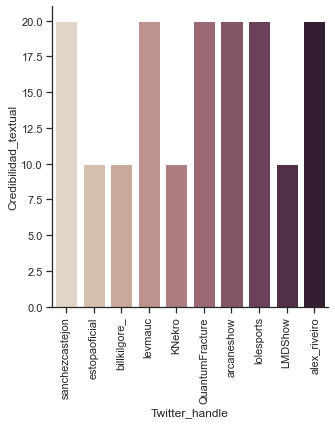

In [32]:
sns.catplot(x="Twitter_handle", y="Credibilidad_textual",kind = "bar", palette="ch:.25", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sanchezcastejon'),
  Text(1, 0, 'estopaoficial'),
  Text(2, 0, 'billkilgore_'),
  Text(3, 0, 'levmauc'),
  Text(4, 0, 'KNekro'),
  Text(5, 0, 'QuantumFracture'),
  Text(6, 0, 'arcaneshow'),
  Text(7, 0, 'lolesports'),
  Text(8, 0, 'LMDShow'),
  Text(9, 0, 'alex_riveiro')])

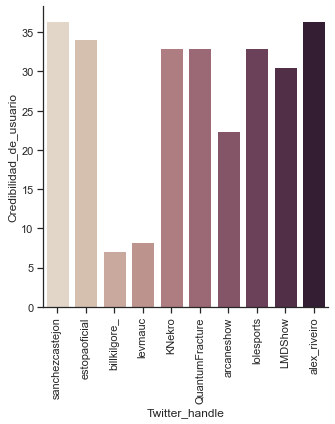

In [33]:
sns.catplot(x="Twitter_handle", y="Credibilidad_de_usuario",kind = "bar", palette="ch:.25", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sanchezcastejon'),
  Text(1, 0, 'estopaoficial'),
  Text(2, 0, 'billkilgore_'),
  Text(3, 0, 'levmauc'),
  Text(4, 0, 'KNekro'),
  Text(5, 0, 'QuantumFracture'),
  Text(6, 0, 'arcaneshow'),
  Text(7, 0, 'lolesports'),
  Text(8, 0, 'LMDShow'),
  Text(9, 0, 'alex_riveiro')])

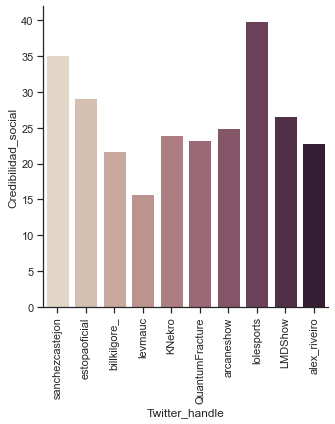

In [34]:
sns.catplot(x="Twitter_handle", y="Credibilidad_social",kind = "bar", palette="ch:.25", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sanchezcastejon'),
  Text(1, 0, 'estopaoficial'),
  Text(2, 0, 'billkilgore_'),
  Text(3, 0, 'levmauc'),
  Text(4, 0, 'KNekro'),
  Text(5, 0, 'QuantumFracture'),
  Text(6, 0, 'arcaneshow'),
  Text(7, 0, 'lolesports'),
  Text(8, 0, 'LMDShow'),
  Text(9, 0, 'alex_riveiro')])

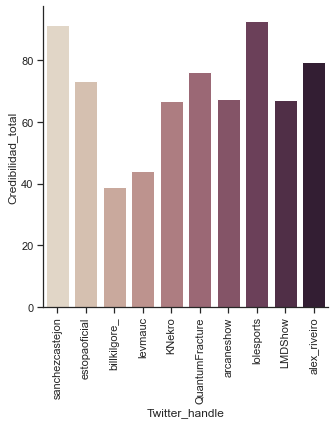

In [35]:
sns.catplot(x="Twitter_handle", y="Credibilidad_total",kind = "bar", palette="ch:.25", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '38.7537159103136'),
  Text(1, 0, '43.98449391648866'),
  Text(2, 0, '66.93360943922633'),
  Text(3, 0, '67.18166211444532'),
  Text(4, 0, '67.28228849250172'),
  Text(5, 0, '73.29892087307816'),
  Text(6, 0, '76.28796889587883'),
  Text(7, 0, '79.31312882760294'),
  Text(8, 0, '91.57021880801273'),
  Text(9, 0, '92.8962404621179')])

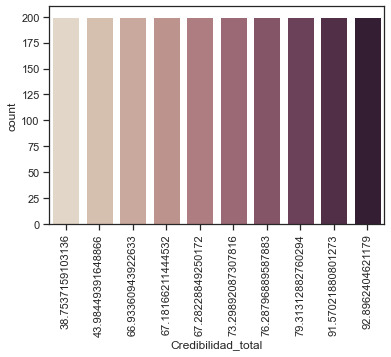

In [66]:
import numpy as np
df = df.sort_values('Credibilidad_total', ascending=False)
tweets = pd.concat([df]*200, ignore_index=True)

sns.countplot(x="Credibilidad_total",palette="ch:.25", data=tweets)
plt.xticks(rotation=90)

In [55]:
tweets

,Unique_ID,org_name,org_url,Twitter_URL,Twitter_handle,earliest_tweet_in_db,number_of_tweets_in_db,Followers,Following,Created_at,Verified,Credibilidad_textual,Credibilidad_de_usuario,Credibilidad_social,Credibilidad_total
0,8,LoL Esports,NaN,https://twitter.com/lolesports,lolesports,NaN,NaN,2195607,549,2012,True,20,32.941176,39.955064,92.896240
1,1,Pedro Sanchez,NaN,https://twitter.com/sanchezcastejon,sanchezcastejon,NaN,NaN,1668885,6034,2009,True,20,36.470588,35.099631,91.570219
2,10,Alex Riveiro,NaN,https://twitter.com/alex_riveiro,alex_riveiro,NaN,NaN,318190,799,2009,True,20,36.470588,22.842541,79.313129
3,6,Crespo,NaN,https://twitter.com/QuantumFracture,QuantumFracture,NaN,NaN,372247,695,2012,True,20,32.941176,23.346792,76.287969
4,2,Estopa,NaN,https://twitter.com/estopaoficial,estopaoficial,NaN,NaN,1011518,726,2011,True,10,34.117647,29.181274,73.298921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7,Arcane,NaN,https://twitter.com/arcaneshow,arcaneshow,NaN,NaN,542285,14,2021,True,20,22.352941,24.929347,67.282288
1996,9,Illojuan,NaN,https://twitter.com/LMDShow,LMDShow,NaN,NaN,726400,371,2014,True,10,30.588235,26.593427,67.181662
1997,5,Knekro,NaN,https://twitter.com/KNekro,KNekro,NaN,NaN,440555,278,2012,True,10,32.941176,23.992433,66.933609
1998,4,Antonio,NaN,https://twitter.com/levmauc,levmauc,NaN,NaN,378085,236085,2016,False,20,8.235294,15.749200,43.984494


In [56]:
df

,Unique_ID,org_name,org_url,Twitter_URL,Twitter_handle,earliest_tweet_in_db,number_of_tweets_in_db,Followers,Following,Created_at,Verified,Credibilidad_textual,Credibilidad_de_usuario,Credibilidad_social,Credibilidad_total
7,8,LoL Esports,NaN,https://twitter.com/lolesports,lolesports,NaN,NaN,2195607,549,2012,True,20,32.941176,39.955064,92.896240
0,1,Pedro Sanchez,NaN,https://twitter.com/sanchezcastejon,sanchezcastejon,NaN,NaN,1668885,6034,2009,True,20,36.470588,35.099631,91.570219
9,10,Alex Riveiro,NaN,https://twitter.com/alex_riveiro,alex_riveiro,NaN,NaN,318190,799,2009,True,20,36.470588,22.842541,79.313129
5,6,Crespo,NaN,https://twitter.com/QuantumFracture,QuantumFracture,NaN,NaN,372247,695,2012,True,20,32.941176,23.346792,76.287969
1,2,Estopa,NaN,https://twitter.com/estopaoficial,estopaoficial,NaN,NaN,1011518,726,2011,True,10,34.117647,29.181274,73.298921
6,7,Arcane,NaN,https://twitter.com/arcaneshow,arcaneshow,NaN,NaN,542285,14,2021,True,20,22.352941,24.929347,67.282288
8,9,Illojuan,NaN,https://twitter.com/LMDShow,LMDShow,NaN,NaN,726400,371,2014,True,10,30.588235,26.593427,67.181662
4,5,Knekro,NaN,https://twitter.com/KNekro,KNekro,NaN,NaN,440555,278,2012,True,10,32.941176,23.992433,66.933609
3,4,Antonio,NaN,https://twitter.com/levmauc,levmauc,NaN,NaN,378085,236085,2016,False,20,8.235294,15.749200,43.984494
2,3,Billkilgore,NaN,https://twitter.com/billkilgore_,billkilgore_,NaN,NaN,203926,1634,2017,False,10,7.058824,21.694892,38.753716
